In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
from datetime import datetime
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Data của mọi cầu thủ EPL từ 2014-2019

In [2]:
player_data_whole_season = pd.read_csv("Player_Data/season_data/whole_season_combined_2014_2019.csv")

In [3]:
print(player_data_whole_season.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3140 non-null   int64  
 1   player_name        3140 non-null   object 
 2   games              3140 non-null   int64  
 3   time               3140 non-null   int64  
 4   goals_season       3140 non-null   int64  
 5   xG_season          3140 non-null   float64
 6   assists_season     3140 non-null   int64  
 7   xA_season          3140 non-null   float64
 8   shots_season       3140 non-null   int64  
 9   key_passes_season  3140 non-null   int64  
 10  yellow_cards       3140 non-null   int64  
 11  red_cards          3140 non-null   int64  
 12  position           3140 non-null   object 
 13  team_title         3140 non-null   object 
 14  npg_season         3140 non-null   int64  
 15  npxG_season        3140 non-null   float64
 16  xGChain            3140 

#### ***Thông tin Dataset Cầu thủ***

| STT | Tên Cột | Kiểu dữ liệu | Mô tả |
|---|----------|--------------|--------|
| 1 | `id` | int64 | Mã số định danh duy nhất của cầu thủ |
| 2 | `player_name` | object | Tên cầu thủ |
| 3 | `games` | int64 | Số trận đã tham gia |
| 4 | `time` | int64 | Số phút thi đấu trong mùa giải |
| 5 | `goals_season` | int64 | Tổng số bàn thắng ghi được trong mùa |
| 6 | `xG_season` | float64 | Chỉ số bàn thắng kỳ vọng - xác suất ghi bàn |
| 7 | `assists_season` | int64 | Tổng số đường kiến tạo |
| 8 | `xA_season` | float64 | Chỉ số kiến tạo kỳ vọng - xác suất kiến tạo |
| 9 | `shots_season` | int64 | Tổng số cú sút |
| 10 | `key_passes_season` | int64 | Số đường chuyền tạo cơ hội sút |
| 11 | `yellow_cards` | int64 | Số thẻ vàng nhận được |
| 12 | `red_cards` | int64 | Số thẻ đỏ nhận được |
| 13 | `position` | object | Vị trí thi đấu |
| 14 | `team_title` | object | Tên đội bóng |
| 15 | `npg_season` | int64 | Số bàn thắng không tính phạt đền |
| 16 | `npxG_season` | float64 | Chỉ số bàn thắng kỳ vọng không tính phạt đền |
| 17 | `xGChain` | float64 | Chỉ số bàn thắng kỳ vọng từ các pha bóng có sự tham gia |
| 18 | `xGBuildup` | float64 | Chỉ số bàn thắng kỳ vọng từ các pha chuyền bóng (ko trực tiếp dẫn đến cú sút) |
| 19 | `season` | int64 | Năm của mùa giải |



In [4]:
print(player_data_whole_season.describe())

                id        games         time  goals_season    xG_season  \
count  3140.000000  3140.000000  3140.000000   3140.000000  3140.000000   
mean   1963.261465    20.035669  1435.537261      1.907006     1.968541   
std    2199.659034    11.767635  1047.974648      3.505280     3.223214   
min      12.000000     1.000000     1.000000      0.000000     0.000000   
25%     623.000000    10.000000   450.000000      0.000000     0.084678   
50%     847.500000    21.000000  1343.000000      0.000000     0.763317   
75%    1760.000000    30.000000  2314.250000      2.000000     2.346602   
max    8563.000000    38.000000  3420.000000     32.000000    26.859891   

       assists_season    xA_season  shots_season  key_passes_season  \
count     3140.000000  3140.000000   3140.000000        3140.000000   
mean         1.356688     1.401483     18.365287          13.695223   
std          2.201719     1.956941     22.954572          17.285576   
min          0.000000     0.000000      

In [5]:
print(player_data_whole_season.isnull().sum())

id                   0
player_name          0
games                0
time                 0
goals_season         0
xG_season            0
assists_season       0
xA_season            0
shots_season         0
key_passes_season    0
yellow_cards         0
red_cards            0
position             0
team_title           0
npg_season           0
npxG_season          0
xGChain              0
xGBuildup            0
season               0
dtype: int64


In [6]:
print(player_data_whole_season.duplicated().sum())

0


In [8]:
# sửa các giá trị bị lỗi trong cột player_name
import html
def decode_html(col):
    return html.unescape(col)
player_data_whole_season["player_name"] = player_data_whole_season["player_name"].apply(decode_html)

#### Top 5 vua phá lưới, phong độ và xu hướng chơi của họ qua từng mùa giải

In [9]:
top_scores_list = []
# tạo list chứa top 5 cầu thủ ghi bàn nhiều nhất mỗi mùa
for i in range(2014, 2020):
    top_scores_list.append(
        player_data_whole_season[player_data_whole_season["season"] == i]
        .sort_values(by="goals_season", ascending=False)
        .head()
    )
top_scores = pd.concat(top_scores_list, ignore_index=True)

In [10]:
# số lần các cầu thủ lọt vào top 5 vua phá lưới EPL từ 2014-2019
display(top_scores.value_counts("player_name").reset_index(name="count").head())

,player_name,count
0,Sergio Agüero,5
1,Harry Kane,4
2,Jamie Vardy,4
3,Mohamed Salah,3
4,Alexis Sánchez,2


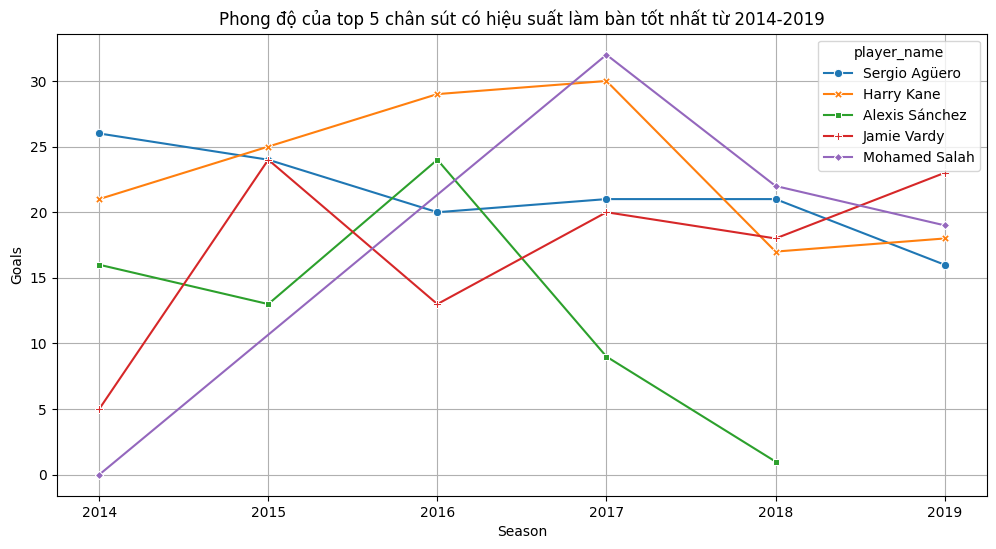

In [11]:
# top 5 cầu thủ có hiệu suất làm bàn tốt nhất từ 2014-2019
top_5_scorers_list = (
    top_scores.value_counts("player_name")
    .reset_index(name="count")
    .head()["player_name"]
    .tolist()
)


plt.figure(figsize=(12, 6))
sns.lineplot(
    x="season",
    y="goals_season",
    hue="player_name",
    data=player_data_whole_season[
        player_data_whole_season["player_name"].isin(top_5_scorers_list)
    ],
    markers=True,
    style="player_name",
    dashes=False,
)

plt.xlabel("Season")
plt.ylabel("Goals")
plt.grid()
plt.title("Phong độ của top 5 chân sút có hiệu suất làm bàn tốt nhất từ 2014-2019")
plt.show()

- Những cầu thủ duy trì hiệu suất làm bàn tốt qua các mùa là **Harry Kane**, **Sergio Aguero**, **Jamie Vardy**
- Sự vươn lên của **Salah** với mùa giải 2017 trong khi **Alexis Sanchez** sụt giảm phong độ nhanh trong cùng mùa giải


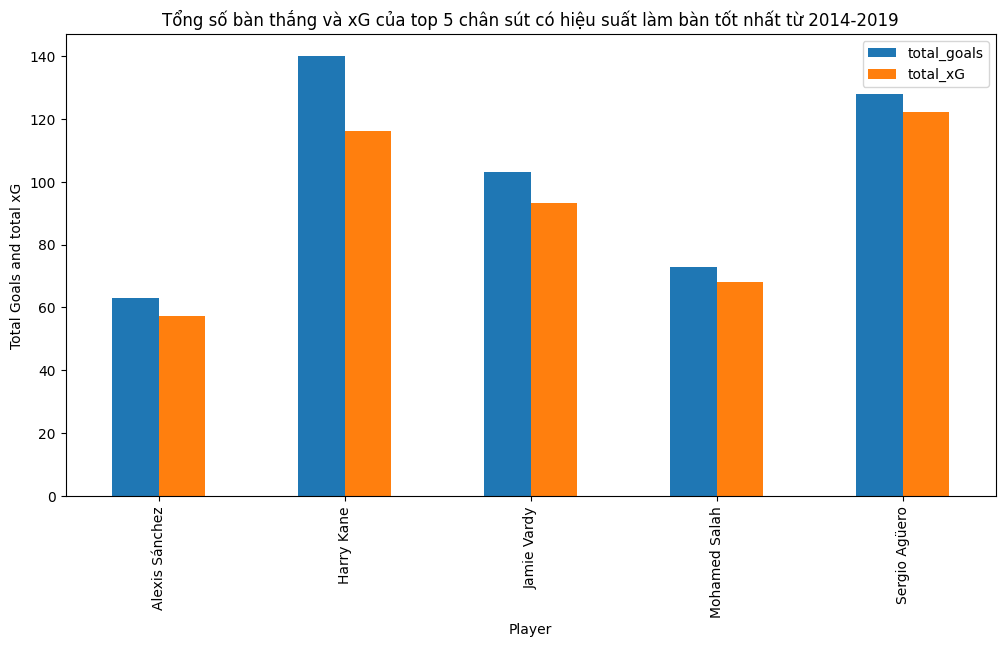

In [12]:
player_data_whole_season[
    (player_data_whole_season["player_name"].isin(top_5_scorers_list))
].groupby("player_name").agg(
    total_goals=("goals_season", "sum"),
    total_xG=("xG_season", "sum"),
).plot(
    kind="bar", figsize=(12, 6)
)
plt.xlabel("Player")
plt.ylabel("Total Goals and total xG")
plt.title("Tổng số bàn thắng và xG của top 5 chân sút có hiệu suất làm bàn tốt nhất từ 2014-2019")
plt.show()

- Những cầu thủ thường xuyên nằm trong danh sách vua phá lưới EPL qua các năm đều có khả năng tận dụng cơ hội tốt, họ đều có số bàn thắng thực tế cao hơn chỉ số bàn thắng kì vọng, đặc biệt là **Harry Kane** với bàn thắng thực tế hơn đáng kể so với bàn thắng kì vọng, cho thấy khả năng làm bàn từ những góc khó hay cự li xa, ít có khả năng thành bàn


In [13]:
# thông số về bàn thắng, kiến tạo và khả năng đóng góp vào lối chơi chung của top 5 chân sút nhiều bàn nhất tại EPL từ 2014-2019
top_5_scorers_stat = (
    player_data_whole_season[
        player_data_whole_season["player_name"].isin(top_5_scorers_list)
    ][["player_name", "goals_season", "assists_season", "xGChain", "xGBuildup"]]
    .groupby("player_name")
    .sum()
    .sort_values(by="goals_season", ascending=False)
)

top_5_scorers_stat["rate_impact"] = (
    top_5_scorers_stat["xGChain"] / top_5_scorers_stat["xGBuildup"]
)
top_5_scorers_stat

,goals_season,assists_season,xGChain,xGBuildup,rate_impact
player_name,,,,,
Harry Kane,140,20,129.583416,33.718832,3.843058
Sergio Agüero,128,30,141.230299,34.089289,4.142952
Jamie Vardy,103,29,110.581292,13.423629,8.237809
Mohamed Salah,73,28,99.001446,22.206358,4.458248
Alexis Sánchez,63,31,110.099680,43.739601,2.517162


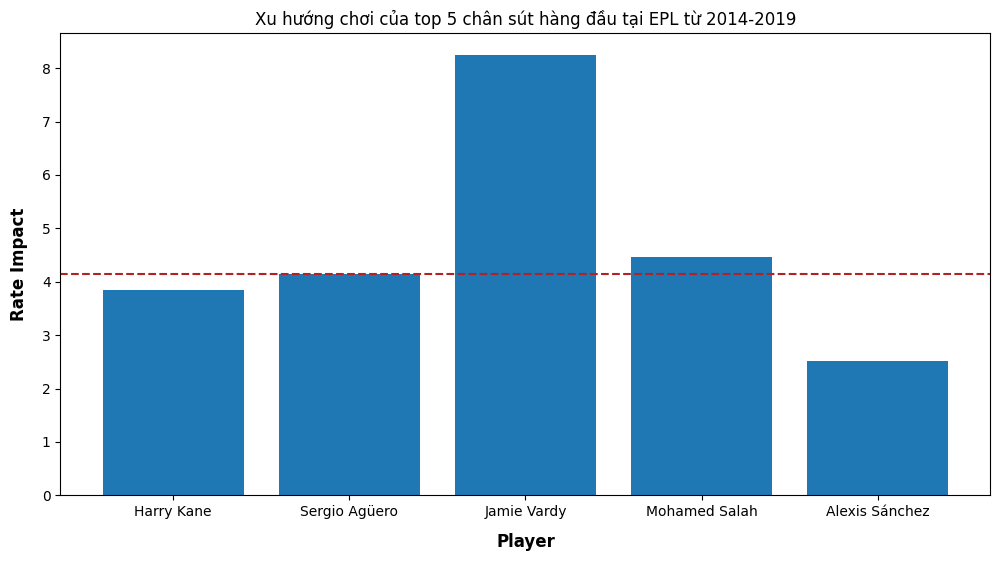

In [14]:
#biểu đồ thể hiện khả năng đóng góp vào lối chơi chung của các chân sút hàng đầu
fig = plt.figure(figsize=(12, 6))
plt.bar(top_5_scorers_stat.index, top_5_scorers_stat["rate_impact"])
plt.xlabel("Player",labelpad=10,fontdict={"fontsize":12,"fontweight":"bold"})
plt.ylabel("Rate Impact",labelpad=10,fontdict={"fontsize":12,"fontweight":"bold"})
plt.title("Xu hướng chơi của top 5 chân sút hàng đầu tại EPL từ 2014-2019")
plt.axhline(top_5_scorers_stat["rate_impact"].median(), color="firebrick", linestyle="--")
plt.show()

- **_rate_impact_** của những cầu thủ như **Mohamed Salah, Harry Kane hay Sergio Aguero** cho thấy ngoài khả năng ghi bàn thì họ vẫn có thể đóng góp 1 phần vào khả năng tổ chức lối chơi

- **Jamie Vardy** có **_rate_impact_** rất cao, cho thấy xu hướng của cầu thủ này là thường xuyên rình rập gần vòng cấm thay vì tham gia tổ chức từ tuyến dưới, ngược lại với **Alexis Sanchez** thiên về xây dựng lối chơi hơn là trực chờ trong khu vực cấm địa 


#### Top 5 vua kiến tạo, phong độ và xu hướng chơi của họ qua từng mùa giải

In [15]:
# top 5 kiến tạo nhiều nhất mùa 2014
top_assist_list = []
# tạo list chứa top 5 kiến tạo nhiều nhất mỗi mùa
for i in range(2014, 2020):
    top_5_assist = player_data_whole_season[player_data_whole_season["season"] == i].nlargest(7, "assists_season")
    top_assist_list.append(top_5_assist)
    
top_assist = pd.concat(top_assist_list, ignore_index=True)

Text(0.5, 1.0, 'Phong độ của top 5 chân chuyền có hiệu suất kiến tạo tốt nhất từ 2014-2019')

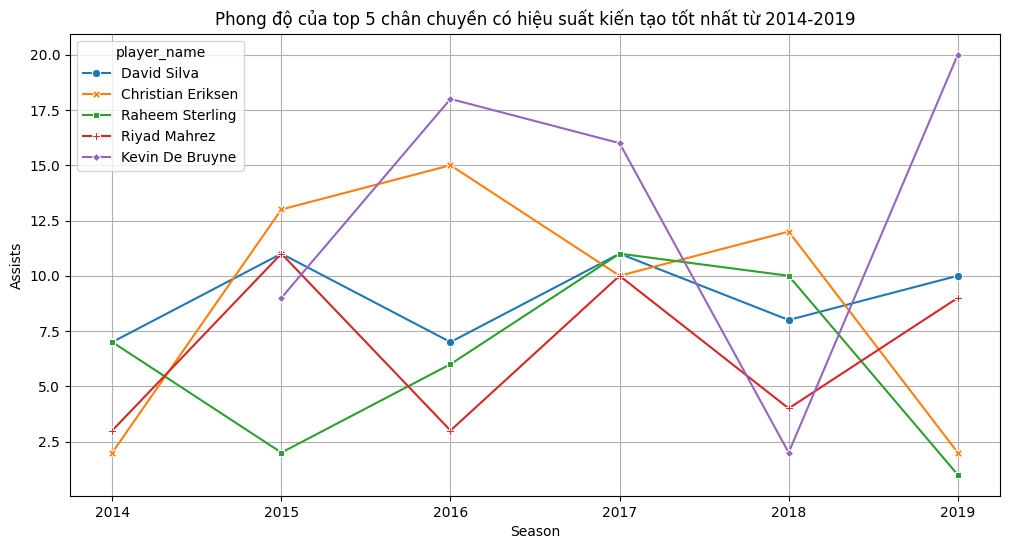

In [16]:
# top 5 cầu thủ có hiệu suất kiến tạo tốt nhất từ 2014-2019

top_5_assist_list = (
    top_assist.value_counts("player_name")
    .reset_index(name="count")
    .head()["player_name"]
    .tolist()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x="season",
    y="assists_season",
    hue="player_name",
    data=player_data_whole_season[
        player_data_whole_season["player_name"].isin(top_5_assist_list)
    ],
    markers=True,
    style="player_name",
    dashes=False,
)
plt.xlabel("Season")
plt.ylabel("Assists")
plt.grid()
plt.title("Phong độ của top 5 chân chuyền có hiệu suất kiến tạo tốt nhất từ 2014-2019")

- Xu hướng chung:

  - Sự biến động: Phong độ của các cầu thủ thường xuyên thay đổi theo từng mùa giải, điều này cho thấy EPL là giải đấu đầy biến động.

  - Sự trưởng thành: Nhiều cầu thủ như Sterling và Mahrez cho thấy sự nổi lên về khả năng kiến tạo.

- Phân tích từng cầu thủ:

  - Kevin De Bruyne : Có phong độ kiến tạo tốt nhất, đặc biệt là 2019, khi số lần kiến tạo của anh đạt mức cao nhất (20 lần). Sau mùa giải 2018 bị chấn thương, anh đã hồi phục mạnh mẽ vào năm 2019.

  - Christian Eriksen : Phong độ khá ổn định, với một đỉnh cao vào năm 2016 trước khi giảm dần trong các mùa sau đó.

  - David Silva : Duy trì phong độ ổn định, không có nhiều sự dao động lớn qua các năm. Phong độ của anh dao động từ khoảng 7 đến 12 lần kiến tạo mỗi mùa.

  - Raheem Sterling : Sau khi bứt lên mạnh mẽ từ 2016 thì vào năm 2019 cầu thủ này tụt phong độ thảm hại 

  - Riyad Mahrez: Phong độ thất thường tuy nhiên vẫn có 1 mùa giải hay vào 2015


In [17]:
top_5_assist_stat = (
    player_data_whole_season[player_data_whole_season["player_name"].isin(top_5_assist_list)][["player_name", "goals_season", "assists_season", "xGChain", "xGBuildup"]].groupby("player_name").sum().sort_values(by="assists_season", ascending=False)
)
top_5_assist_stat["rate_impact"] = (
    top_5_assist_stat["xGChain"] / top_5_assist_stat["xGBuildup"]
)
top_5_assist_stat

,goals_season,assists_season,xGChain,xGBuildup,rate_impact
player_name,,,,,
Kevin De Bruyne,37,65,128.180580,74.445204,1.721811
Christian Eriksen,44,54,114.970254,64.777275,1.774855
David Silva,38,54,152.203743,90.681318,1.678447
Riyad Mahrez,57,40,103.197470,41.844495,2.466214
Raheem Sterling,75,37,148.798167,51.923904,2.865697


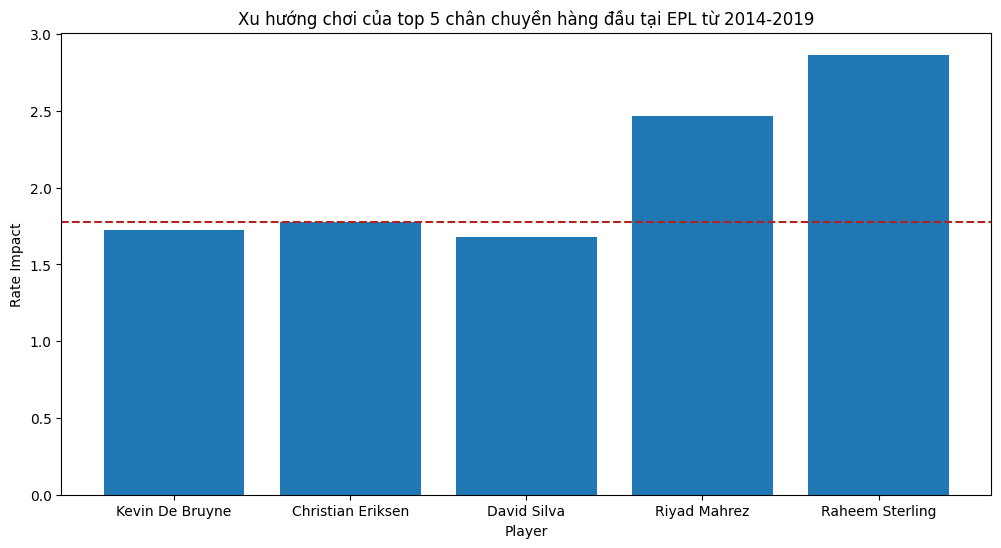

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Xu hướng chơi của top 5 chân chuyền hàng đầu tại EPL từ 2014-2019')
plt.bar(top_5_assist_stat.index, top_5_assist_stat['rate_impact'])
plt.xlabel('Player')
plt.ylabel('Rate Impact')   
plt.axhline(top_5_assist_stat['rate_impact'].median(), color='firebrick', linestyle='--')
plt.show()

### Data của EPL về các đội bóng từ mùa giải 2014-2019

In [19]:
epl_season_data = pd.read_csv("./Season_Data/whole_season_combined_2014_2019.csv")

In [20]:
epl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position      120 non-null    int64  
 1   team          120 non-null    object 
 2   matches       120 non-null    int64  
 3   wins          120 non-null    int64  
 4   draws         120 non-null    int64  
 5   loses         120 non-null    int64  
 6   scored        120 non-null    int64  
 7   conceded      120 non-null    int64  
 8   pts           120 non-null    int64  
 9   xG            120 non-null    float64
 10  xG_diff       120 non-null    float64
 11  npxG          120 non-null    float64
 12  xGA           120 non-null    float64
 13  xGA_diff      120 non-null    float64
 14  npxGA         120 non-null    float64
 15  npxGD         120 non-null    float64
 16  ppda_coef     120 non-null    float64
 17  oppda_coef    120 non-null    float64
 18  deep          120 non-null    

#### Thông tin Dataset Đội bóng

| STT | Tên Cột | Kiểu dữ liệu | Mô tả |
|---|----------|--------------|--------|
| 1 | `position` | int64 | Vị trí xếp hạng của đội bóng trong mùa giải |
| 2 | `team` | object | Tên đội bóng |
| 3 | `matches` | int64 | Số trận đã thi đấu |
| 4 | `wins` | int64 | Số trận thắng |
| 5 | `draws` | int64 | Số trận hòa |
| 6 | `loses` | int64 | Số trận thua |
| 7 | `scored` | int64 | Tổng số bàn thắng ghi được |
| 8 | `conceded` | int64 | Tổng số bàn thua |
| 9 | `pts` | int64 | Tổng số điểm |
| 10 | `xG` | float64 | Chỉ số bàn thắng kỳ vọng |
| 11 | `xG_diff` | float64 | Chênh lệch giữa bàn thắng thực tế và bàn thắng kỳ vọng |
| 12 | `npxG` | float64 | Chỉ số bàn thắng kỳ vọng không tính phạt đền |
| 13 | `xGA` | float64 | Chỉ số bàn thua kỳ vọng |
| 14 | `xGA_diff` | float64 | Chênh lệch giữa bàn thua thực tế và bàn thua kỳ vọng |
| 15 | `npxGA` | float64 | Chỉ số bàn thua kỳ vọng không tính phạt đền |
| 16 | `npxGD` | float64 | Chênh lệch giữa chỉ số bàn thắng kỳ vọng không tính phạt đền và chỉ số bàn thua kỳ vọng không tính phạt đền |
| 17 | `ppda_coef` | float64 | Chỉ số PPDA (Passes Per Defensive Action) - số đường chuyền đối phương thực hiện trên mỗi hành động phòng ngự của đội |
| 18 | `oppda_coef` | float64 | Chỉ số OPPDA (Opponent Passes Per Defensive Action) - số đường chuyền đội thực hiện trên mỗi hành động phòng ngự của đối phương |
| 19 | `deep` | int64 | Số lần tấn công sâu vào vùng cấm đối phương |
| 20 | `deep_allowed` | int64 | Số lần cho phép đối phương tấn công sâu vào vùng cấm |
| 21 | `xpts` | float64 | Chỉ số điểm kỳ vọng |
| 22 | `xpts_diff` | float64 | Chênh lệch giữa điểm thực tế và điểm kỳ vọng |
| 23 | `season` | int64 | Năm của mùa giải |

In [21]:
epl_season_data.head()

,position,team,matches,wins,draws,loses,scored,conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,season
0,1,Chelsea,38,26,9,3,73,32,87,68.643320,-4.356680,64.740402,31.524344,-0.475656,29.240835,35.499567,10.942027,13.419520,407,171,75.3172,-11.6828,2014
1,2,Manchester City,38,24,7,7,83,38,79,75.815441,-7.184559,69.609091,40.499403,2.499403,37.454762,32.154329,7.982490,15.076979,575,144,73.0982,-5.9018,2014
2,3,Arsenal,38,22,9,7,71,36,75,69.802591,-1.197409,64.474404,35.718825,-0.281175,33.435352,31.039052,8.660596,13.254169,398,171,75.1740,0.1740,2014
3,4,Manchester United,38,20,10,8,62,37,70,54.206860,-7.793140,50.401013,39.842347,2.842347,36.797702,13.603311,7.648715,15.521977,267,194,63.0327,-6.9673,2014
4,5,Tottenham,38,19,7,12,58,53,64,52.385284,-5.614716,48.427014,57.044148,4.044148,51.598938,-3.171924,8.000237,11.300694,210,232,48.9361,-15.0639,2014


In [22]:
epl_season_data.describe()

,position,matches,wins,draws,loses,scored,conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,season
count,120.000000,120.0,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,10.500000,38.0,14.450000,9.10000,14.450000,51.575000,51.575000,52.450000,50.762647,-0.812353,47.219513,50.762647,-0.812353,47.219513,-2.368476e-16,11.847171,11.847171,249.566667,249.566667,52.563676,0.113676,2016.500000
std,5.790459,0.0,6.293721,2.87674,5.843692,17.282946,12.796837,17.987788,14.326816,6.333911,13.364947,10.942834,6.631225,10.209264,2.177329e+01,2.867043,4.057951,105.688836,58.937046,14.487114,7.532755,1.714986
min,1.000000,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,16.000000,26.527059,-23.203113,25.004717,24.511918,-16.990427,22.687925,-3.286364e+01,6.677875,6.019176,125.000000,96.000000,29.610600,-24.721600,2014.000000
25%,5.750000,38.0,10.000000,7.00000,10.000000,39.000000,41.000000,40.000000,39.946644,-5.010837,37.595824,43.426284,-4.805464,39.626458,-1.558507e+01,9.695005,9.465287,177.250000,201.750000,40.974200,-4.531925,2015.000000
50%,10.500000,38.0,12.000000,9.00000,15.000000,47.500000,51.500000,47.000000,48.225979,-0.262619,45.018551,52.228541,-1.190465,48.420051,-6.045744e+00,11.441113,10.906504,211.500000,258.500000,48.825900,1.283300,2016.500000
75%,15.250000,38.0,18.250000,11.00000,19.000000,62.250000,60.250000,64.500000,57.881744,3.582894,53.445427,57.631333,3.933579,53.469849,1.366552e+01,13.538645,12.674218,282.500000,297.250000,61.924575,5.321300,2018.000000
max,20.000000,38.0,32.000000,17.00000,28.000000,106.000000,81.000000,100.000000,102.205233,12.562637,93.533026,73.586610,15.540152,68.258560,6.798795e+01,21.896752,30.468113,582.000000,357.000000,91.089300,14.034500,2019.000000


#### Bàn thắng, bàn thua


In [23]:
# các đội bóng trong top 6 và xuống hạng từ 2014-2019
big_six = (epl_season_data[epl_season_data["position"] <= 6]["team"].value_counts().head(6))

relegated_clubs = epl_season_data[epl_season_data["position"] >= 18]["team"].value_counts()

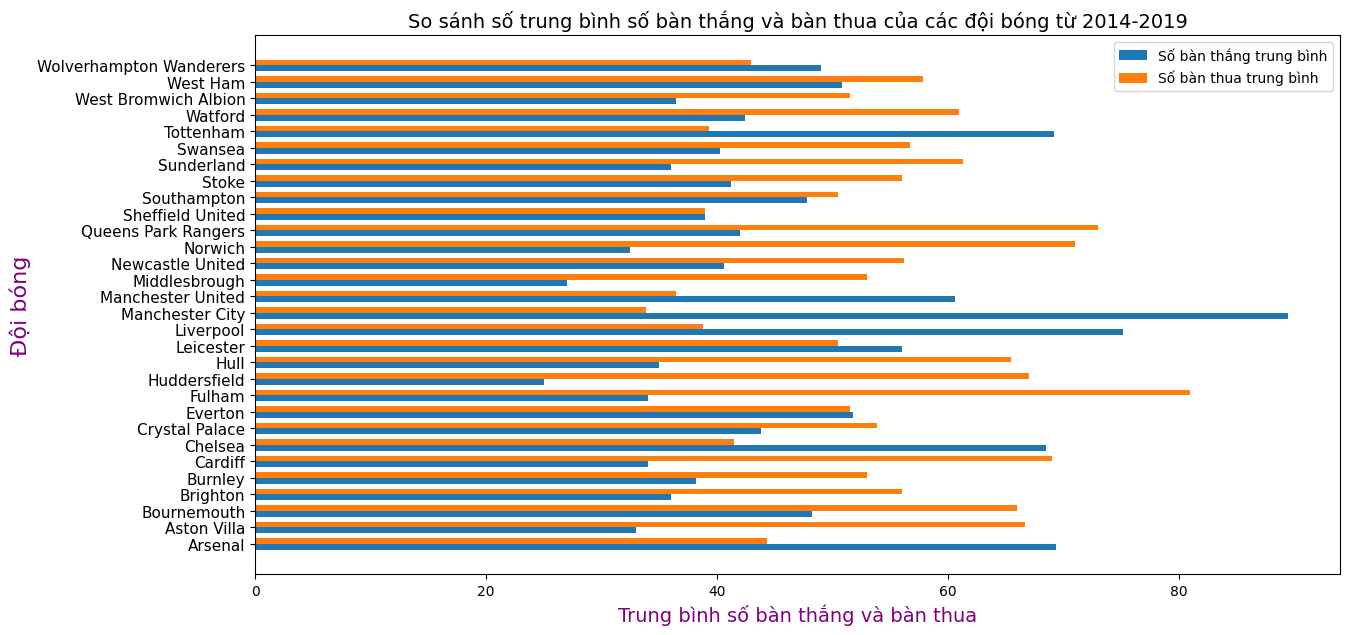

In [24]:
mean_scored = epl_season_data.groupby("team")["scored"].mean()
mean_conceded = epl_season_data.groupby("team")["conceded"].mean()

# Tạo biểu đồ thanh ngang
teams = mean_scored.index
y = np.arange(len(teams)) * 2

plt.figure(figsize=(14, 7))
plt.barh(
    y - 0.35, mean_scored, height=0.7, label="Số bàn thắng trung bình", align="center"
)
plt.barh(
    y + 0.35, mean_conceded, height=0.7, label="Số bàn thua trung bình", align="center"
)

plt.ylabel("Đội bóng", fontdict={"fontsize": 16, "color": "purple"})
plt.xlabel("Trung bình số bàn thắng và bàn thua", fontdict={"fontsize": 14, "color": "purple"})
plt.title(
    "So sánh số trung bình số bàn thắng và bàn thua của các đội bóng từ 2014-2019",
    fontdict={"fontsize": 14},
)
plt.yticks(y, teams, fontsize=11)
plt.legend()
plt.show()

In [25]:
# Tỉ lệ những đội bóng xuống hạng có số bàn thua trung bình lớn hơn số bàn thắng trung bình
print(len(relegated_clubs.index) / len(mean_conceded[mean_conceded > mean_scored].index)*100, "%")

80.0 %


In [26]:
for team in big_six.index:
    print(
        f"Tỉ lệ bàn thắng/bàn thua của {team} là {round(mean_scored[team]/mean_conceded[team],2)}"
    )

Tỉ lệ bàn thắng/bàn thua của Manchester City là 2.65
Tỉ lệ bàn thắng/bàn thua của Manchester United là 1.66
Tỉ lệ bàn thắng/bàn thua của Tottenham là 1.76
Tỉ lệ bàn thắng/bàn thua của Chelsea là 1.65
Tỉ lệ bàn thắng/bàn thua của Arsenal là 1.56
Tỉ lệ bàn thắng/bàn thua của Liverpool là 1.94


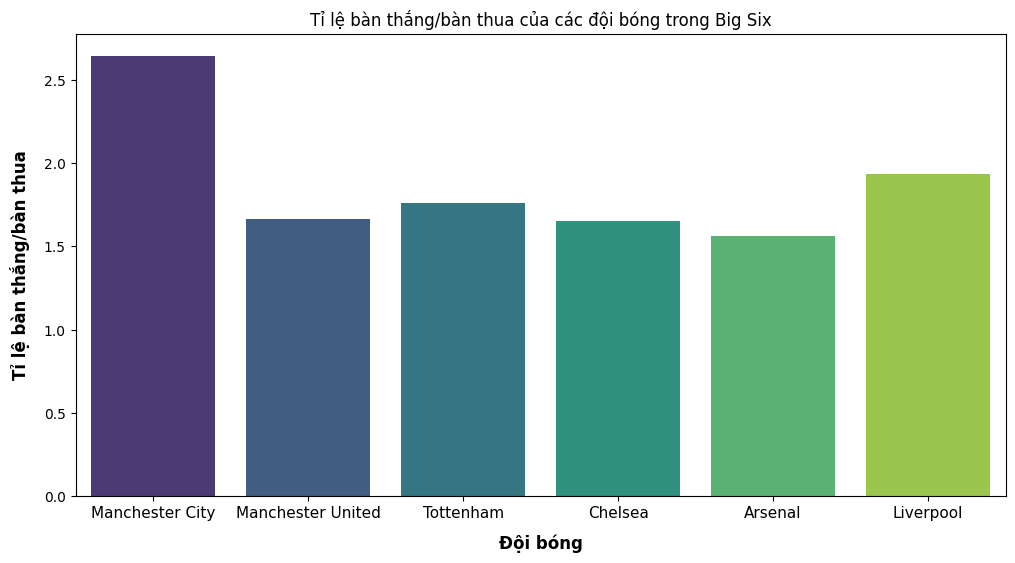

In [27]:
# Biểu đồ thể hiện tỉ lệ bàn thắng/bàn thua của các đội bóng trong Big Six
plt.figure(figsize=(12, 6))
sns.barplot(
    x=big_six.index,
    y=mean_scored[big_six.index] / mean_conceded[big_six.index],
    palette="viridis",
    hue=big_six.index,
)
plt.xlabel("Đội bóng",labelpad=10,fontdict={"fontsize":12,"fontweight":"bold"})
plt.ylabel("Tỉ lệ bàn thắng/bàn thua",labelpad=10,fontdict={"fontsize":12,"fontweight":"bold"})
plt.xticks(fontsize=11)
plt.title("Tỉ lệ bàn thắng/bàn thua của các đội bóng trong Big Six")
plt.show()


- Những đội bóng nằm trong Big 6 đều có số bàn thắng gấp hơn 1,5 lần số bàn thua, điều này cho thấy họ thường xuyên giành chiến thắng và duy trì thứ hạng cao trên BXH
- Manchester City nổi bật với tỷ lệ bàn thắng/bàn thua cao nhất, cho thấy họ là đội bóng mạnh nhất về khả năng tấn công và phòng ngự.
- Các đội bóng khác như Liverpool, Tottenham, Chelsea, Arsenal và Manchester United đều có tỷ lệ bàn thắng/bàn thua khá tốt, nhưng không bằng Manchester City.
- Những đội bóng trong danh sách xuống hạng đều có số bàn thua >>> số bàn thắng khi mà trong danh sách những đội bóng để thủng lưới nhiều hơn số bàn họ ghi được, có tới 80% phải xuống hạng
  


In [28]:
import math

print(
    f"Trung bình các đội bóng đã từng vô địch đều ghi từ {math.floor(epl_season_data[epl_season_data['position']==1]['scored'].mean())} đến {math.ceil(epl_season_data[epl_season_data['position']==1]['scored'].mean())} bàn"
)

Trung bình các đội bóng đã từng vô địch đều ghi từ 85 đến 86 bàn


In [29]:
print(
    f"Trung bình các đội bóng đã từng xuống hạng đều để lọt lưới từ {math.floor(epl_season_data[epl_season_data['position']>=18]['conceded'].mean())} đến {math.ceil(epl_season_data[epl_season_data['position']>=18]['conceded'].mean())} bàn"
)

Trung bình các đội bóng đã từng xuống hạng đều để lọt lưới từ 66 đến 67 bàn


#### Xu hướng chơi của các đội bóng Big Six 

In [30]:
big_six_ppda_oppda = (
    epl_season_data[epl_season_data["team"].isin(big_six.index)]
    .groupby("team")
    .agg(mean_ppda=("ppda_coef", "mean"), mean_oppda=("oppda_coef", "mean"))
    .sort_values(by="team", ascending=True)
)

In [31]:
relegated_ppda_oppda = (
    epl_season_data[epl_season_data["team"].isin(relegated_clubs.index)]
    .groupby("team")
    .agg(mean_ppda=("ppda_coef", "mean"), mean_oppda=("oppda_coef", "mean"))
    .sort_values(by="team", ascending=True)
)
print(relegated_ppda_oppda)

                      mean_ppda  mean_oppda
team                                       
Aston Villa           14.533313    9.076059
Bournemouth           13.881780   10.176030
Burnley               13.378132   10.360262
Cardiff               18.462973    6.019176
Fulham                16.566611   12.021677
Huddersfield          13.219649   10.957359
Hull                  15.079553   10.466155
Middlesbrough         11.045008   10.884778
Newcastle United      14.720859    8.822283
Norwich               13.669594    9.621876
Queens Park Rangers   10.341797    7.591177
Stoke                 12.783820    9.490426
Sunderland            12.434746    8.314667
Swansea               13.553543   11.621698
Watford               11.621233    9.859285
West Bromwich Albion  14.086302    8.598033


In [32]:
df_about_deep = (
    epl_season_data[epl_season_data["team"].isin(big_six.index)]
    .groupby("team")
    .agg(mean_deep=("deep", "mean"), mean_deep_allowed=("deep_allowed", "mean"))
    .sort_values(by="team", ascending=True)
)

In [33]:
rank_conceded = (
    mean_conceded[big_six.index]
    .sort_values(ascending=True)
    .rank(method="min", ascending=True)
)
df_rank_conceded = pd.DataFrame(
    {"mean_conceded": mean_conceded[big_six.index], "rank": rank_conceded}
).sort_values(by="rank")

In [34]:
result = pd.concat([df_about_deep, df_rank_conceded], axis=1)

In [35]:
rank_scored = (mean_scored[big_six.index].sort_values(ascending=True).rank(method="min", ascending=False))
df_rank_scored = pd.DataFrame({"mean_scored": mean_scored[big_six.index], "rank": rank_scored}).sort_values(by="rank",ascending=True)

In [36]:
result_big_six = pd.concat([result, df_rank_scored, big_six_ppda_oppda], axis=1).drop(
    columns=["rank"]
)
display(result_big_six)

,mean_deep,mean_deep_allowed,mean_conceded,mean_scored,mean_ppda,mean_oppda
team,,,,,,
Arsenal,416.000000,211.833333,44.333333,69.333333,9.667335,14.083376
Chelsea,378.500000,182.000000,41.500000,68.500000,11.186133,13.787812
Liverpool,403.500000,156.333333,38.833333,75.166667,9.234892,18.451917
Manchester City,510.833333,131.666667,33.833333,89.500000,7.914566,21.528164
Manchester United,299.166667,209.666667,36.500000,60.666667,9.555237,13.785241
Tottenham,266.333333,204.000000,39.333333,69.166667,8.873361,13.548352


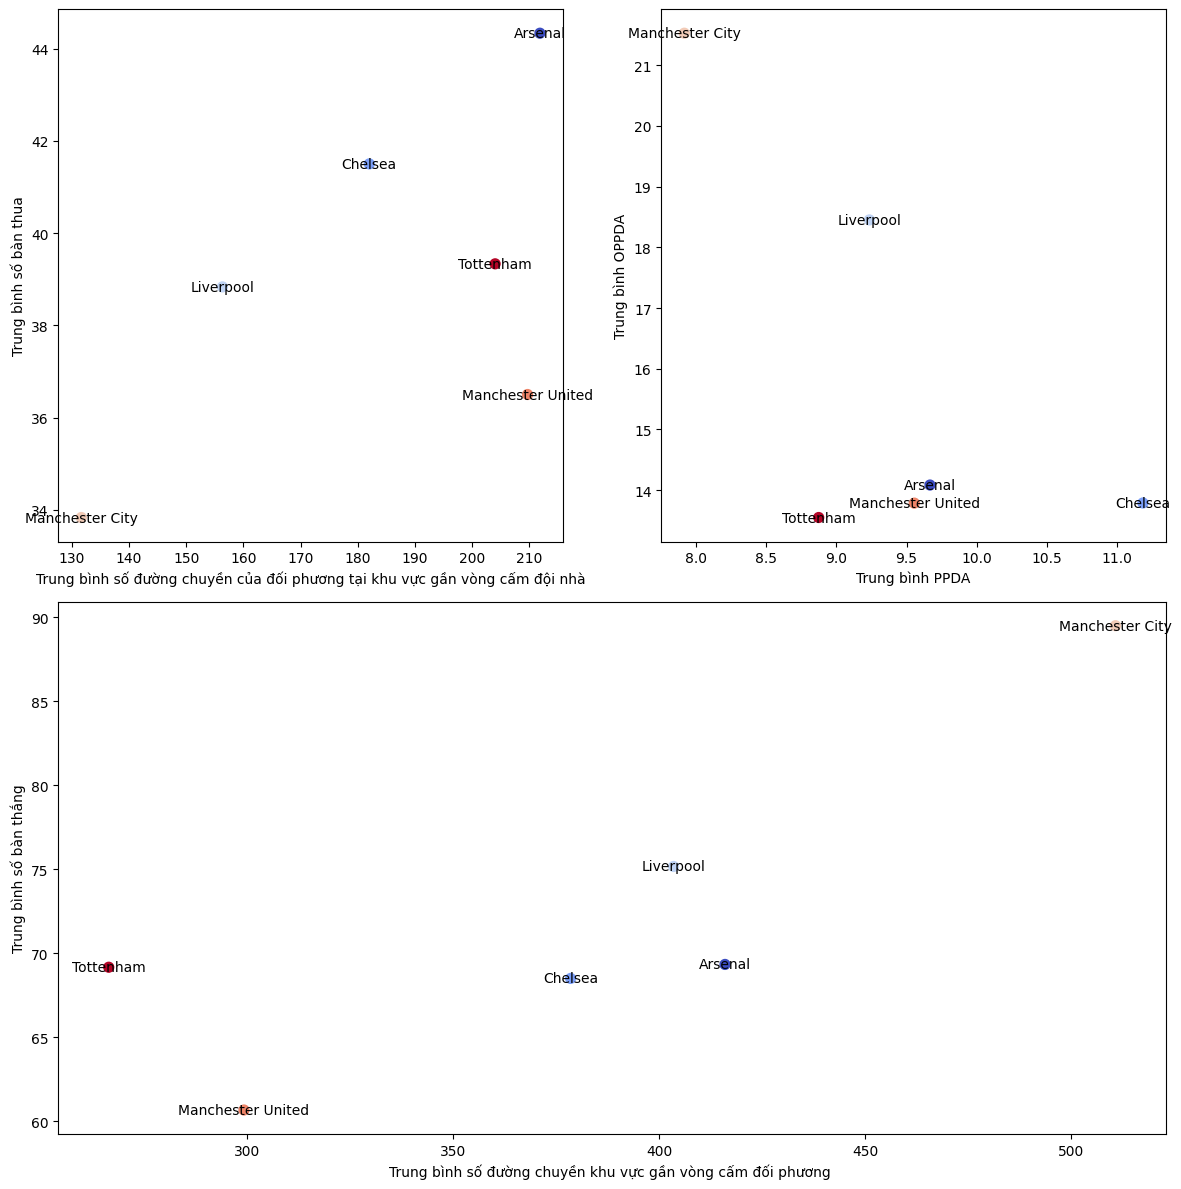

In [37]:

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Biểu đồ đầu tiên
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(result_big_six["mean_deep_allowed"], result_big_six["mean_conceded"], cmap="coolwarm", c=range(6), s=1 * 50)
for i, team in enumerate(big_six.index.sort_values()):
    ax1.annotate(team, (result_big_six["mean_deep_allowed"].iloc[i], result_big_six["mean_conceded"].iloc[i]), fontsize=10, ha="center", va="center")
ax1.set_xlabel("Trung bình số đường chuyền của đối phương tại khu vực gần vòng cấm đội nhà")
ax1.set_ylabel("Trung bình số bàn thua")

# Biểu đồ thứ hai
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(result_big_six["mean_ppda"], result_big_six["mean_oppda"], cmap="coolwarm", c=range(6), s=1 * 50)
for i, team in enumerate(big_six.index.sort_values()):
    ax2.annotate(team, (result_big_six["mean_ppda"].iloc[i], result_big_six["mean_oppda"].iloc[i]), fontsize=10, ha="center", va="center")
ax2.set_xlabel("Trung bình PPDA")
ax2.set_ylabel("Trung bình OPPDA")

# Biểu đồ thứ 3
ax3 = fig.add_subplot(gs[1, :])
ax3.scatter(result_big_six["mean_deep"], result_big_six["mean_scored"], cmap="coolwarm", c=range(6), s=1 * 50)

for i, team in enumerate(big_six.index.sort_values()):
    ax3.annotate(team, (result_big_six["mean_deep"].iloc[i], result_big_six["mean_scored"].iloc[i]), fontsize=10, ha="center", va="center")

ax3.set_xlabel("Trung bình số đường chuyền khu vực gần vòng cấm đối phương ")
ax3.set_ylabel("Trung bình số bàn thắng")

plt.tight_layout()
plt.show()

**PPDA cho biết số đường chuyền trung bình mà đội bóng để cho đối phương thực hiện trước khi thực hiện bất kì hành động phòng ngự nào như tắc bóng, chặn bóng hoặc giành quyền kiểm soát.**

**OPPDA ngược lại với PPDA, nó là chỉ số cho biết số đường chuyền mà đội nhà thực hiện được trước khi đối phương có các hành động như tắc bóng, chặn bóng hay giành quyền kiểm soát bóng**

- Man City có số trung bình số bàn thua thấp do khả năng kiểm soát bóng tốt (OPPDA cao) cũng như số đường chuyền mà đối phương có thể chuyền trong khu vực gần vòng cấm của họ thấp cho thấy họ có khả năng phòng ngự từ xa và pressing tốt (PPDA thấp). Số đường chuyền trung bình của họ ở cuối sân đối phương cũng như số bàn thắng là vượt trội => ***Xu hướng gây áp lực lớn, áp đảo đối phương để tạo ra cơ hội, chủ trương kiểm soát hoàn toàn thế trận 1 cách chặt chẽ với nhân sự tốt đồng đều ở các tuyến***

- Liverpool có xu hướng tương tự Man City, có điều là các thông số của Man City vượt trội hơn

- Man United trung bình để nhận khoảng 210 đường chuyền trong khu vực gần vòng cấm đội nhà (đứng thứ 2) tuy nhiên số bàn thua trung bình của họ thấp thứ 2 giải đấu => ***Họ chủ động lui về với 1 hàng phòng ngự tốt, chịu đc áp lực lớn từ đối phương***. Số đường chuyền khu vực vòng cấm đối phương thấp và số bàn thắng thấp => ***Lối chơi phụ thuộc vào những tình huống phản công nhanh***

- Tottenham có trung bình cả PPDA, OPPDA và trung bình số đường chuyền tại khu vực rìa vòng cấm của họ đều thấp => ***Thường xuyên tạo áp lực để giành lại bóng và cũng kết thúc tình huống nhanh chứ ko có xu hướng kiểm soát bóng lâu***. Tuy nhiên số bàn thắng của họ ko quá tệ khi tương đương Arsenal, đội có các thông số về số đường chuyền khu vực nguy hiểm, OPPDA cao hơn hẳn Tottenham => ***Hàng công có các chân sút tận dụng cơ hội để ghi bàn tốt, điển hình là Harry Kane***

- Arsenal trung bình có nhiều đường chuyền tại khu vực nguy hiểm (đứng thứ 2) tuy nhiên trung bình số bàn thắng của họ lại ko cao => ***Hàng công tận dụng cơ hội chưa tốt.*** Bên cạnh đó, OPPDA thấp cho thấy họ ít khi kiểm soát bóng mà thường xuyên chuyển trạng thái nhanh cũng dẫn đến tỉ lệ thành bàn chưa thực sự cao => ***Ảnh hưởng đến số bàn thắng***. Về mặt trận phòng ngự, Arsenal đứng đầu về trung bình số đường chuyền mà đối phương thực hiện tại rìa vòng cấm dẫn cũng như bàn thua => ***Hàng thủ phòng ngự quá tệ***

- Chelsea có PPDA cao nhất (cho phép đối thủ thực hiện nhiều đường chuyền) tuy nhiên OPPDA lại thấp thứ 2 (ko giữ bóng lâu) trong các đội Big Six, tuy nhiên họ có số bàn thua nhiều thứ 2 trong các đội Big Six nhưng số bàn thắng ít thứ 2 => ***Lối chơi phòng ngự phản công, tuy nhiên hàng thủ và hàng công chưa thực sự ổn định***


#### Khả năng chuyển hoá bàn thắng hoặc nhận phải bàn thua ở thực tế so với dự đoán

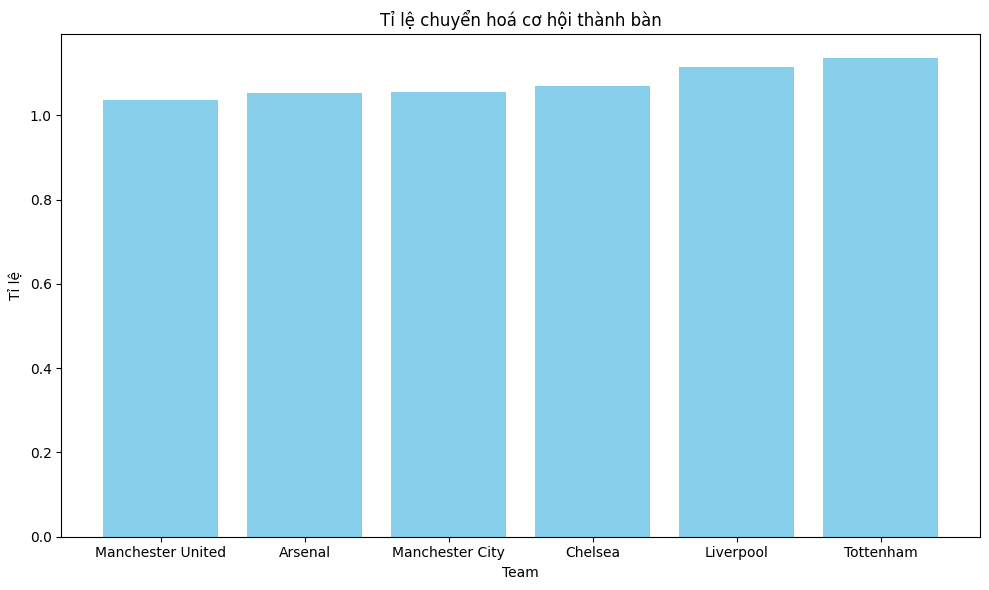

In [38]:
big_six_scored_xG = epl_season_data[epl_season_data["team"].isin(big_six.index)].groupby("team").agg(sum_scored=("scored", "sum"), sum_xG=("xG", "sum"))
# Tính toán tỷ lệ chuyển đổi cơ hội
big_six_scored_xG["conversion_rate"] = big_six_scored_xG["sum_scored"] / big_six_scored_xG["sum_xG"]
plt.figure(figsize=(10, 6))
plt.bar(big_six_scored_xG.sort_values(by="conversion_rate").index, big_six_scored_xG["conversion_rate"].sort_values(), color='skyblue')
plt.xlabel('Team')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ chuyển hoá cơ hội thành bàn') 
plt.tight_layout()
plt.show()

- Nhìn chung các đội bóng Big Six đều có khả năng chuyển hoá cơ hội thành bàn thắng ổn
    - Tottenham có khả năng tận dụng cơ hội tốt nhất kể cả những tình huống khó thành bàn 1 phần do trong đội của họ có Harry Kane
    - Manchester United có khả năng chuyển hoá những cơ hội thành bàn tệ nhất

In [39]:
big_six_conceded_xGA = epl_season_data[epl_season_data["team"].isin(big_six.index)].groupby("team").agg(sum_conceded=("conceded", "sum"), sum_xGA=("xGA", "sum"))
display(big_six_conceded_xGA)

,sum_conceded,sum_xGA
team,,
Arsenal,266,279.942651
Chelsea,249,218.000206
Liverpool,233,218.254533
Manchester City,203,194.818301
Manchester United,219,245.021590
Tottenham,236,267.039622


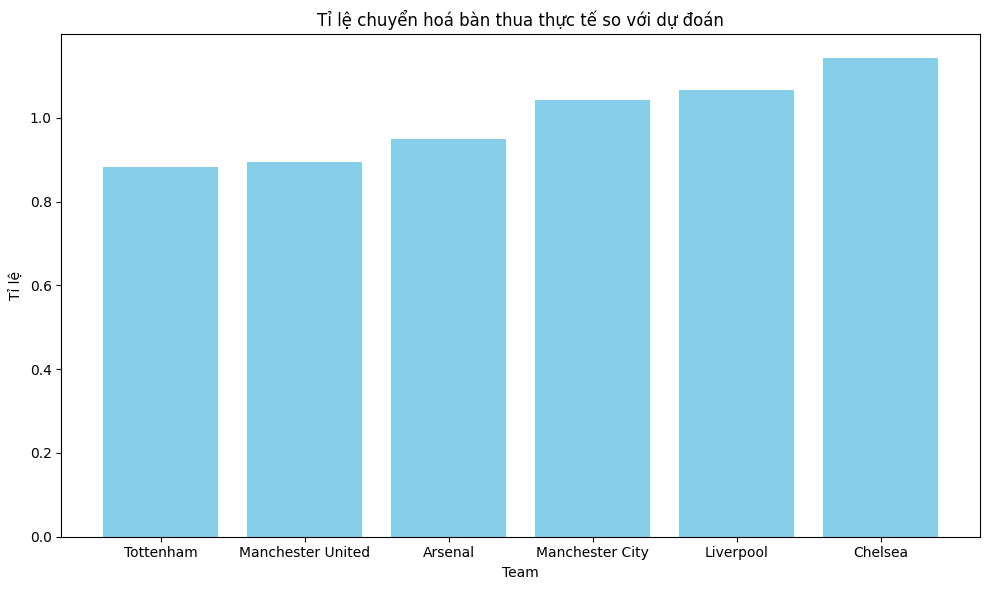

In [40]:
big_six_conceded_xGA["conversion_rate"] = big_six_conceded_xGA["sum_conceded"] / big_six_conceded_xGA["sum_xGA"]
plt.figure(figsize=(10, 6))
plt.xlabel('Team')
plt.ylabel('Tỉ lệ')
plt.bar(big_six_conceded_xGA.sort_values(by="conversion_rate",ascending=True).index, (big_six_conceded_xGA["sum_conceded"]/big_six_conceded_xGA["sum_xGA"]).sort_values(ascending=True), color='skyblue')
plt.title('Tỉ lệ chuyển hoá bàn thua thực tế so với dự đoán')
plt.tight_layout()
plt.show()

- Man United, Arsenal và Tottenham có khả năng phòng ngự tốt khi đều có số bàn thua thực tế < số bàn thua kì vọng 
- Manchester City, Chelsea và Liverpool có khả năng phòng ngự kém hơn khi có số bàn thua thực tế > số bàn thua kì vọng 

### Data chi tiết về các đội bóng trong từng mùa

In [41]:
team_stats_all_season = pd.read_csv("./Team_Data/whole_team_combined_2014_2019.csv")
team_stats_all_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GW            4560 non-null   int64  
 1   date          4560 non-null   object 
 2   result        4560 non-null   object 
 3   Home/Away     4560 non-null   object 
 4   xG            4560 non-null   float64
 5   scored        4560 non-null   int64  
 6   xGA           4560 non-null   float64
 7   conceded      4560 non-null   int64  
 8   xpts          4560 non-null   float64
 9   pts           4560 non-null   int64  
 10  npxG          4560 non-null   float64
 11  npxGA         4560 non-null   float64
 12  ppda          4560 non-null   object 
 13  ppda_allowed  4560 non-null   object 
 14  ppda_coef     4560 non-null   float64
 15  oppda_coef    4560 non-null   float64
 16  deep          4560 non-null   int64  
 17  deep_allowed  4560 non-null   int64  
 18  npxGD         4560 non-null 

##### Biểu đồ tỉ lệ thắng chung của các đội Big Six qua các mùa giải 


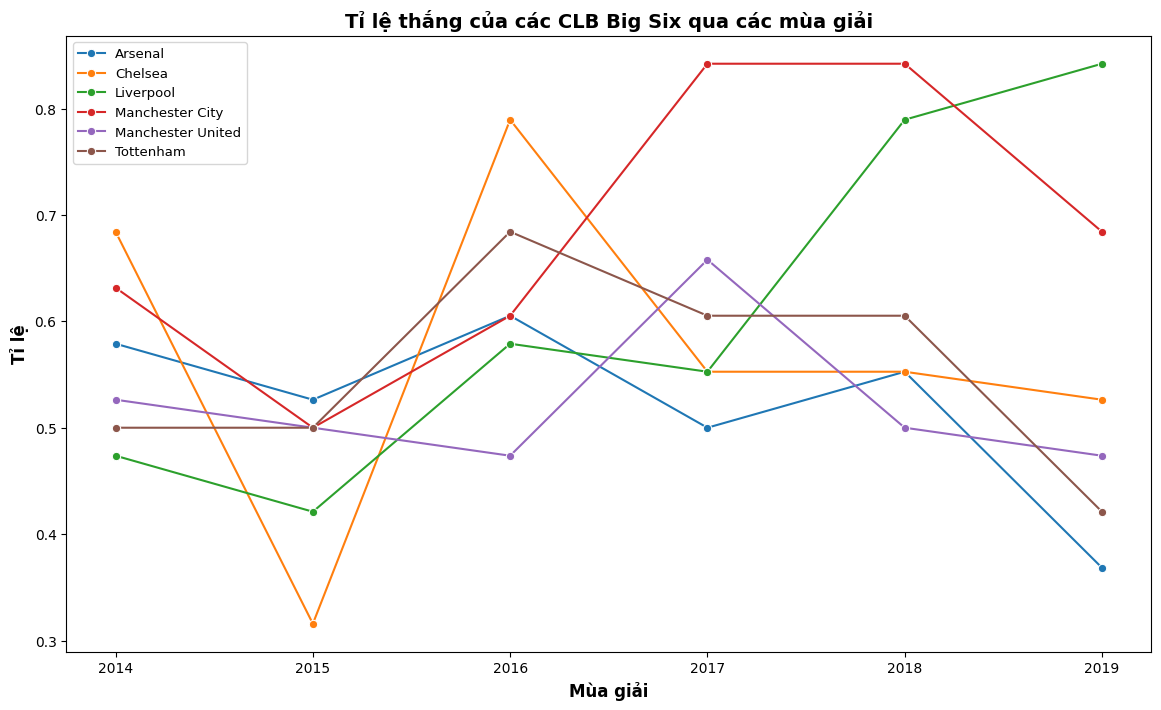

In [42]:
#tính tổng số trận thắng và thua trong 1 mùa giải của các clb nhóm big six
team_stats_all_season[team_stats_all_season['team'].isin(big_six.index)].groupby(["team", "season","Home/Away"])['result'].value_counts().fillna(0).unstack()

#biểu đồ thể hiện tỉ lệ thắng qua các năm của các đội bóng big six
big_six_win_rate=team_stats_all_season[team_stats_all_season['team'].isin(big_six.index)].groupby(["team", "season"])['result'].value_counts(normalize=True).unstack().fillna(0)

big_six_win_rate.columns = ['draw', 'lose', 'win']

big_six_win_rate.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ các cột cho từng đội bóng
# teams = big_six_win_rate['team'].unique()
# for i, team in enumerate(teams):
#     team_data = big_six_win_rate[big_six_win_rate['team'] == team]
#     plt.plot(index, team_data['win'], marker='o', label=f'Tỉ lệ thắng của {team}')
sns.lineplot(
    x="season",
    y="win", 
    hue="team",
    data=big_six_win_rate,
    marker='o'
    )
plt.xlabel("Mùa giải",fontdict={"fontsize":12,"fontweight":"bold"})
plt.ylabel("Tỉ lệ", fontdict={"fontsize":12,"fontweight":"bold"})
plt.title("Tỉ lệ thắng của các CLB Big Six qua các mùa giải",fontdict={"fontsize":14,'fontweight':'bold'})
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), fontsize=9.5)
plt.show()

***Tỷ lệ thắng của các đội bóng liên tục thay đổi qua các mùa giải, cho thấy sự cạnh tranh vô cùng khốc liệt tại Ngoại hạng Anh. Không có đội bóng nào thống trị hoàn toàn trong suốt giai đoạn này. Mặc dù có những mùa giải nổi bật, nhưng không có đội bóng nào duy trì được phong độ ổn định để luôn dẫn đầu về tỷ lệ thắng***

- Manchester City: Có giai đoạn thăng hoa mạnh mẽ, đặc biệt là ở những mùa giải gần đây. Điều này cho - thấy sự đầu tư mạnh mẽ và chiến lược phát triển bền vững của đội bóng này

- Liverpool: Cũng là một trong những đội bóng có thành tích ổn định và luôn cạnh tranh quyết liệt cho chức vô địch nhờ có chiến lược đầu tư đúng đắn và có 1 HLV giỏi là Jurgen Klopp

- Chelsea: Có những mùa giải thành công nhưng cũng có những mùa giải sa sút. Sự thay đổi HLV liên tục có thể là một trong những nguyên nhân ảnh hưởng đến thành tích của đội bóng

- Manchester United: Gặp khó khăn trong việc tìm lại vị thế số 1. Giai đoạn này đánh dấu sự suy giảm so với những năm hoàng kim trước đó do thay đổi HLV liên tục, đường lối phát triển chưa đúng đắn

- Arsenal và Tottenham: Cả hai đội bóng đều có những giai đoạn lên cao và xuống thấp liên tục nhưng ko có mùa giải nào đạt đỉnh cho thấy sự ko ổn định, điều này có thể do chính sách và đường hướng phát triển chưa thực sự hợp lý của CLB.

##### Biểu đồ phân tích hiệu suất sân nhà 

In [43]:
big_six_win_rate_home_away=team_stats_all_season[team_stats_all_season['team'].isin(big_six.index)].groupby(["team", "season","Home/Away"])['result'].value_counts(normalize=True).unstack().fillna(0)
big_six_win_rate_home_away.reset_index(inplace=True)
big_six_win_rate_home_away.rename(columns={'d':'draw','l':'lose','w':'win'},inplace=True)

<Axes: title={'center': 'Tỉ lệ thắng của các đội bóng Big Six tại sân nhà qua các mùa giải'}, xlabel='Mùa giải', ylabel='Tỉ lệ thắng'>

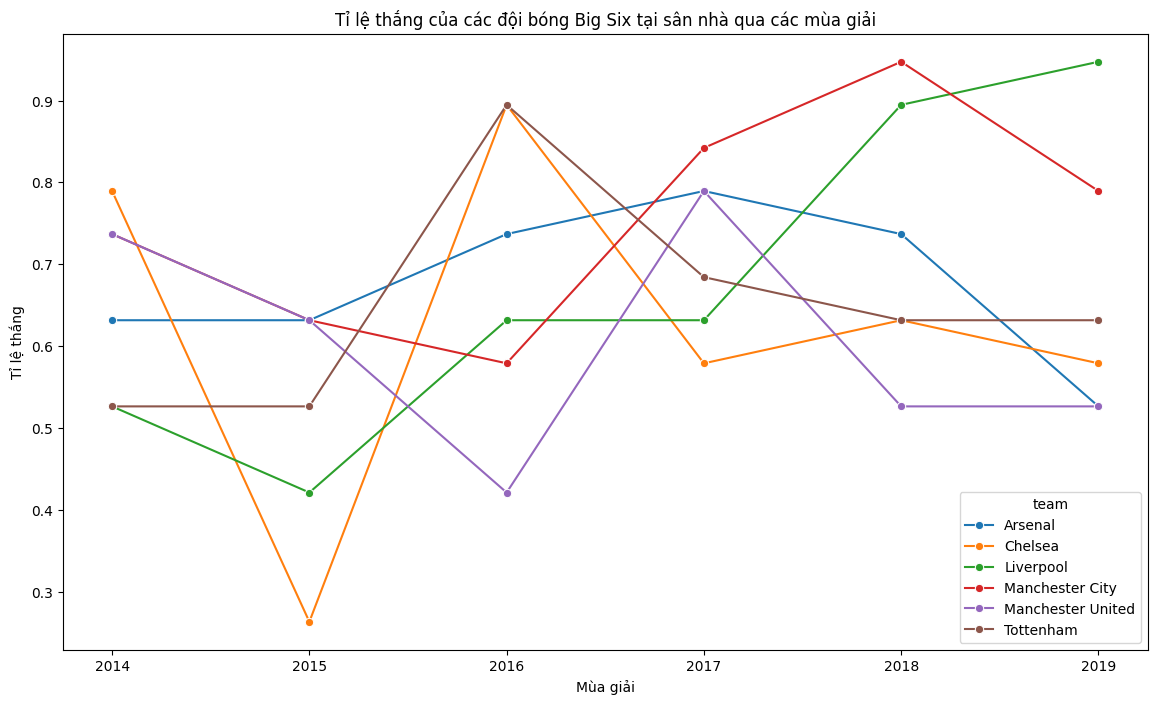

In [44]:

plt.figure(figsize=(14, 8))
plt.xlabel('Mùa giải')
plt.ylabel('Tỉ lệ thắng')
plt.title('Tỉ lệ thắng của các đội bóng Big Six tại sân nhà qua các mùa giải')
sns.lineplot(x='season', y='win', hue='team', data=big_six_win_rate_home_away[big_six_win_rate_home_away['Home/Away']=='h'], marker='o')

* **Arsenal**:
    * Tỷ lệ thắng của Arsenal duy trì ổn định từ mùa giải 2014 đến 2017, sau đó giảm mạnh vào mùa giải 2018 và tiếp tục giảm vào mùa giải 2019.

* **Chelsea**:
    * Chelsea có sự biến động lớn trong tỷ lệ thắng. Đỉnh điểm là mùa giải 2015 với tỷ lệ thắng rất thấp, sau đó tăng mạnh vào mùa giải 2017 và giảm dần trong các mùa giải tiếp theo.

* **Liverpool**:
    * Liverpool có xu hướng tăng dần tỷ lệ thắng qua các mùa giải. Bắt đầu từ mức thấp vào mùa giải 2014, tỷ lệ thắng tăng liên tục và đạt đỉnh vào mùa giải 2018 và 2019.

* **Manchester City**:
    * Manchester City có tỷ lệ thắng cao và ổn định. Bắt đầu từ mùa giải 2014 với tỷ lệ thắng cao, tỷ lệ này tiếp tục tăng và đạt đỉnh vào mùa giải 2018, sau đó giảm nhẹ vào mùa giải 2019.

* **Manchester United**:
    * Manchester United có sự biến động lớn trong tỷ lệ thắng. Bắt đầu từ mức cao vào mùa giải 2014, tỷ lệ thắng giảm mạnh vào mùa giải 2016, sau đó tăng trở lại vào mùa giải 2017 và giảm dần trong các mùa giải tiếp theo.

* **Tottenham**:
    * Tottenham có sự biến động không đều trong tỷ lệ thắng. Bắt đầu từ mức cao vào mùa giải 2014, tỷ lệ thắng giảm mạnh vào mùa giải 2015, sau đó tăng trở lại vào mùa giải 2017 và giảm dần trong các mùa giải tiếp theo.
> **Tổng quan**
>- Liverpool và Manchester City là hai đội bóng có xu hướng tăng tỷ lệ thắng rõ rệt qua các mùa giải, đặc biệt là Liverpool với sự tăng trưởng liên tục.
>- Chelsea và Manchester United có sự biến động lớn, không duy trì được sự ổn định trong tỷ lệ thắng.
>- Arsenal và Tottenham có xu hướng giảm tỷ lệ thắng trong các mùa giải gần đây.
>-----



##### Biểu đồ phân tích hiệu suất sân khách 

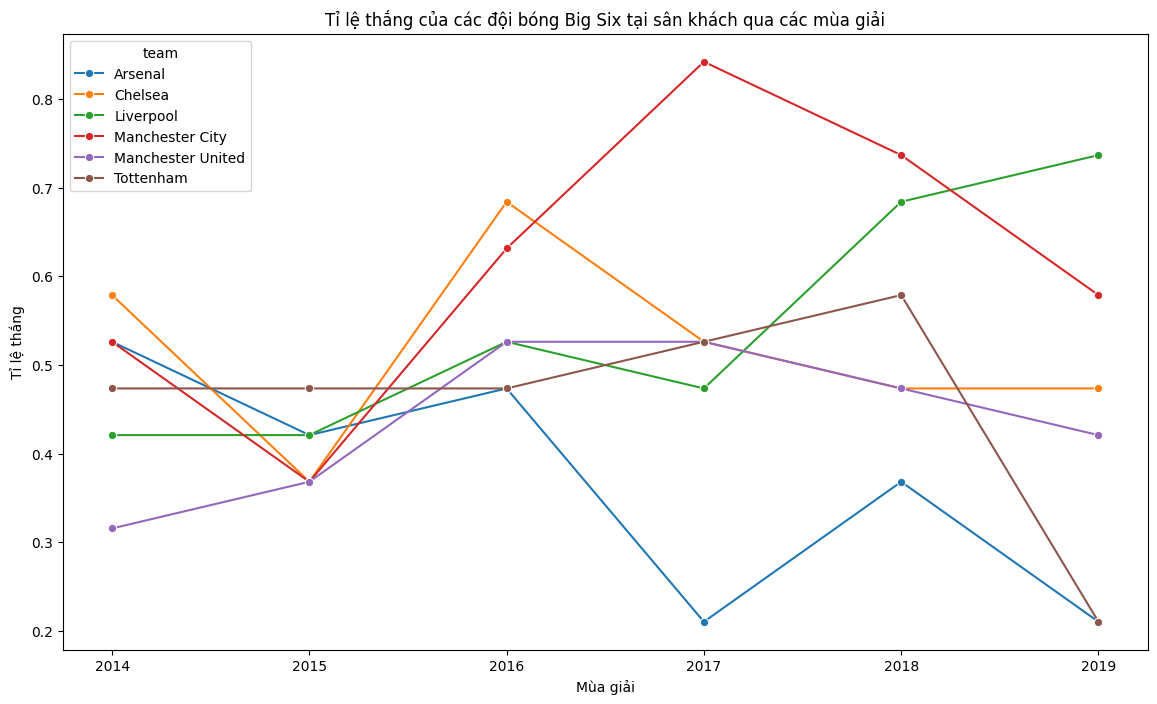

In [45]:
plt.figure(figsize=(14, 8))
plt.xlabel('Mùa giải')
plt.ylabel('Tỉ lệ thắng')
plt.title('Tỉ lệ thắng của các đội bóng Big Six tại sân khách qua các mùa giải')
sns.lineplot(x='season', y='win', hue='team', data=big_six_win_rate_home_away[big_six_win_rate_home_away['Home/Away']=='a'], marker='o')
plt.show()

1. **Arsenal**:
    * Tỷ lệ thắng của Arsenal thấp và có sự biến động lớn. Bắt đầu từ mức ổn vào mùa giải 2014, tỷ lệ này giảm mạnh vào mùa giải 2017 và tiếp tục giảm vào mùa giải 2019.

2. **Chelsea**:
    * Chelsea có tỷ lệ thắng trung bình. Từ mức cao vào mùa giải 2014, tỷ lệ thắng giảm mạnh vào mùa giải 2015, sau đó tăng trở lại vào 2016 tuy nhiên đã giảm dần từ 2017-2019.

3. **Liverpool**:
    * Liverpool có xu hướng tăng dần tỷ lệ thắng qua các mùa giải. Bắt đầu từ mức thấp vào mùa giải 2014, tỷ lệ thắng tăng liên tục và đạt đỉnh vào mùa giải 2019.

4. **Manchester City**:
    * Manchester City có tỷ lệ thắng cao và ổn định. Bắt đầu từ mức cao vào mùa giải 2014, tỷ lệ thắng giảm nhẹ vào mùa giải 2015, sau đó vượt trội so với các đội bóng khác vào 2017, dẫu từ đó tỉ lệ này có giảm tuy nhiên vẫn duy trì ở mức cao cho đến mùa giải 2019.

5. **Manchester United**:
    * Manchester United có sự biến động lớn trong tỷ lệ thắng. Bắt đầu từ mức thấp vào mùa giải 2014, tỷ lệ thắng tăng mạnh vào mùa giải 2016, sau đó giảm và duy trì ở mức trung bình cho đến mùa giải 2019.

6. **Tottenham**:
    * Đội bóng này duy trì tỉ lệ thắng ổn định tuy nhiên chưa thực sự cao ở trên sân khách từ 2014-2016, tuy nhiên từ đó tỉ lệ này đã cải thiện đáng kể đến mùa giải 2018, sau đó tụt dốc không phanh vào mùa giải 2019
    
> ***Tổng quan***
>> - **Manchester City và Liverpool** đã cho thấy hiệu suất ổn định và cao nhất trong các trận đấu sân khách qua các mùa giải.
>> - **Chelsea** cũng duy trì hiệu suất mạnh mẽ nhưng có sự biến động nhiều hơn.
>> - **Tottenham, Manchester United và Arsenal** có hiệu suất dao động nhiều hơn với một số mùa giải có kết quả mạnh mẽ và một số mùa giải có sự suy giảm.
>> - Có xu hướng cải thiện chung cho một số đội, đặc biệt là Liverpool, cho thấy những thay đổi chiến lược hoặc quản lý đã tác động tích cực đến hiệu suất sân khách của họ.
